In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="white")

from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,roc_curve, precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the dataset
data = pd.read_csv('/Users/sharadjoshi/Desktop/Self Study/wdbc.data',header=None)
print(data.shape)
data.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Since column names are not included in the data file but mentioned separately we';; manually create the column list
# from the given descriptions.

#   a) radius (mean of distances from center to points on the perimeter)
#	b) texture (standard deviation of gray-scale values)
#	c) perimeter
#	d) area
#	e) smoothness (local variation in radius lengths)
#	f) compactness (perimeter^2 / area - 1.0)
#	g) concavity (severity of concave portions of the contour)
#	h) concave points (number of concave portions of the contour)
#	i) symmetry 
#	j) fractal dimension ("coastline approximation" - 1)
    
id_diagn = ['id','diagnosis']
measurements = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness',
                'mean_concavity','mean_concave_points','mean_symmetry','mean_fractal_dimension',
               'std_err_radius','std_err_texture','std_err_perimeter','std_err_area','std_err_smoothness','std_err_compactness',
                'std_err_concavity','std_err_concave_points','std_err_symmetry','std_err_fractal_dimension',
               'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness',
                'worst_concavity','worst_concave_points','worst_symmetry','worst_fractal_dimension']



In [4]:
data.columns = id_diagn + measurements

# Questions and answers

1. What are the mean, median and standard deviation of the “perimeter (mean)” feature?

2. Is the first feature in this data set (“radius (mean)”) normally distributed? If not, what might be a more appropriate distribution? Please quantitatively define you answer.

3. Train a classifier to predict the diagnosis of malignant or benign. Please compare the results of two or more classifiers of your choice.

In [167]:
# 1. What are the mean, median and standard deviation of the “perimeter (mean)” feature?

print('total_mean --',data['mean_perimeter'].mean())
print('total_median -- ', data['mean_perimeter'].median())
print('total_standard deviation -- ',data['mean_perimeter'].std())

print('Benign_mean --',data.loc[data['diagnosis']=='B','mean_perimeter'].mean())
print('Benign_median -- ', data.loc[data['diagnosis']=='B','mean_perimeter'].median())
print('Benign_standard deviation -- ',data.loc[data['diagnosis']=='B','mean_perimeter'].std())

print('Malignant_mean --',data.loc[data['diagnosis']=='M','mean_perimeter'].mean())
print('Malignant_median -- ',data.loc[data['diagnosis']=='M','mean_perimeter'].median())
print('Malignant_standard deviation -- ',data.loc[data['diagnosis']=='M','mean_perimeter'].std())

# we can see that on average, higher the mean_perimeter, more the chances of malignant cancer tumor.

total_mean -- 91.96903339191564
total_median --  86.24
total_standard deviation --  24.298981038754906
Benign_mean -- 78.075406162465
Benign_median --  78.18
Benign_standard deviation --  11.80743758010874
Malignant_mean -- 115.36537735849056
Malignant_median --  114.2
Malignant_standard deviation --  21.85465329107372


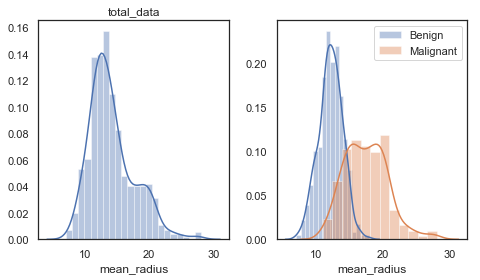

In [189]:
# 2. Is the first feature in this data set (“radius (mean)”) normally distributed? 
# If not, what might be a more appropriate distribution? Please quantitatively define you answer.
plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
sns.distplot(data['mean_radius'])
plt.title('total_data')
plt.subplot(1,3,2)
sns.distplot(data.loc[data['diagnosis']=='B','mean_radius'],label='Benign')
sns.distplot(data.loc[data['diagnosis']=='M','mean_radius'],label = 'Malignant')
plt.legend()
plt.tight_layout()


# Looking at the figures below we can conlcude that the distribution of mean radius is not a guassian
# distribution but a superposition of a gaussain distribution with another approximately(because of small double peak)
# guassian distribution.

In [196]:
# 3. Train a classifier to predict the diagnosis of malignant or benign. 
# Please compare the results of two or more classifiers of your choice.

# I've performed the calculations below (on a blind test set) but mentioning the results here for quick reference.

# Linear SVM

print('SVM_Accuracy ---',  0.9824561403508771)
print('SVM_Precision ---', 0.9736842105263158)
print('SVM_Recall ---', 0.9736842105263158)
print('SVM_F1_score ---', 0.9736842105263158)

# Logistic regression
print('LR_Accuracy ---',  0.9736842105263158)
print('LR_Precision ---', 0.9487179487179487)
print('LR_Recall ---', 0.9736842105263158)
print('LR_F1_score ---', 0.9610389610389611)

# Random forest
print('RFC_Accuracy ---',  0.956140350877193)
print('RFC_Precision ---', 0.9230769230769231)
print('RFC_Recall ---', 0.9473684210526315)
print('RFC_F1_score ---', 0.935064935064935)

SVM_Accuracy --- 0.9824561403508771
SVM_Precision --- 0.9736842105263158
SVM_Recall --- 0.9736842105263158
SVM_F1_score --- 0.9736842105263158
LR_Accuracy --- 0.9736842105263158
LR_Precision --- 0.9487179487179487
LR_Recall --- 0.9736842105263158
LR_F1_score --- 0.9610389610389611
RFC_Accuracy --- 0.956140350877193
RFC_Precision --- 0.9230769230769231
RFC_Recall --- 0.9473684210526315
RFC_F1_score --- 0.935064935064935


# Train, val and blind test set

We'll create a train and blind test set here. The val set will be created on the fly while training the model.

The EDA will be done on train+val set but the blind test set will only used to report the final result
to simulate the ereal life scenario as closely as possible.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[measurements],data['diagnosis'],test_size = 0.2 )

In [6]:
X_train.shape

(455, 30)

In [7]:
X_test.shape

(114, 30)

# EDA

In [8]:
X_train.describe()
# we can see that the range of values between each feature vary a lot so we'll need to normalise the
# featuers when building a predictive model

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.127127,19.298264,91.951912,653.756923,0.096428,0.104233,0.089120,0.049065,0.180753,0.062747,...,16.296407,25.770901,107.492813,881.672747,0.132798,0.255949,0.275017,0.115262,0.290437,0.084240
std,3.457206,4.278601,23.751839,340.055994,0.014036,0.051902,0.077656,0.037804,0.027341,0.007176,...,4.765945,6.145719,33.108702,552.392464,0.022299,0.156496,0.207325,0.064390,0.061491,0.018581
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.685000,16.195000,75.100000,419.250000,0.086515,0.066330,0.029950,0.020695,0.161350,0.057470,...,13.050000,21.325000,84.255000,517.100000,0.116700,0.148200,0.121150,0.065360,0.250800,0.071365
50%,13.450000,18.900000,87.020000,557.200000,0.095970,0.091820,0.063350,0.035150,0.179200,0.061470,...,15.050000,25.470000,98.840000,698.800000,0.131600,0.216700,0.230200,0.101500,0.282600,0.079930
75%,15.935000,21.710000,104.500000,798.300000,0.105400,0.129750,0.132200,0.073820,0.195350,0.066190,...,18.800000,29.915000,125.500000,1086.000000,0.146350,0.339500,0.387200,0.161100,0.318550,0.092165
max,28.110000,39.280000,188.500000,2499.000000,0.163400,0.311400,0.426400,0.191300,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.209800,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
X_train.info()
# There are no missing/null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 477 to 483
Data columns (total 30 columns):
mean_radius                  455 non-null float64
mean_texture                 455 non-null float64
mean_perimeter               455 non-null float64
mean_area                    455 non-null float64
mean_smoothness              455 non-null float64
mean_compactness             455 non-null float64
mean_concavity               455 non-null float64
mean_concave_points          455 non-null float64
mean_symmetry                455 non-null float64
mean_fractal_dimension       455 non-null float64
std_err_radius               455 non-null float64
std_err_texture              455 non-null float64
std_err_perimeter            455 non-null float64
std_err_area                 455 non-null float64
std_err_smoothness           455 non-null float64
std_err_compactness          455 non-null float64
std_err_concavity            455 non-null float64
std_err_concave_points       455 non-null f

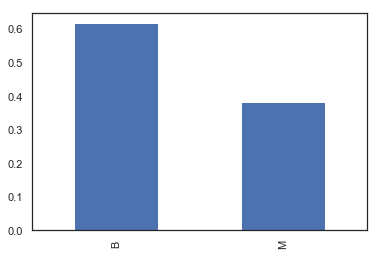

In [197]:
# How many Benign and Malignant cases are there?
(y_train.value_counts()/y_train.shape[0]).plot(kind='bar')
# It looks like a SLIGHTLY imbalanced dataset. By tracking different metrics we can see whether this affects our
# models. If yes, we can try to fix this by over/under/synthetic sampling or by modifiying the loss function
# to penalise the Malignant cases more than Benign cases.

In [11]:
# How does each feature vary for Benign vs Malignant case.
X_train[y_train=='B'].mean() - X_train[y_train=='M'].mean()

# we can see that for almost all features the mean value for Benign cases are lower than mean value for Malignant cases

mean_radius                   -5.159531
mean_texture                  -3.621389
mean_perimeter               -36.163234
mean_area                   -496.271381
mean_smoothness               -0.010123
mean_compactness              -0.062900
mean_concavity                -0.111224
mean_concave_points           -0.060615
mean_symmetry                 -0.018340
mean_fractal_dimension         0.000133
std_err_radius                -0.315107
std_err_texture               -0.000492
std_err_perimeter             -2.255503
std_err_area                 -49.006595
std_err_smoothness             0.000540
std_err_compactness           -0.010261
std_err_concavity             -0.014605
std_err_concave_points        -0.005040
std_err_symmetry              -0.000099
std_err_fractal_dimension     -0.000437
worst_radius                  -7.562537
worst_texture                 -5.716145
worst_perimeter              -52.913972
worst_area                  -835.508960
worst_smoothness              -0.018559


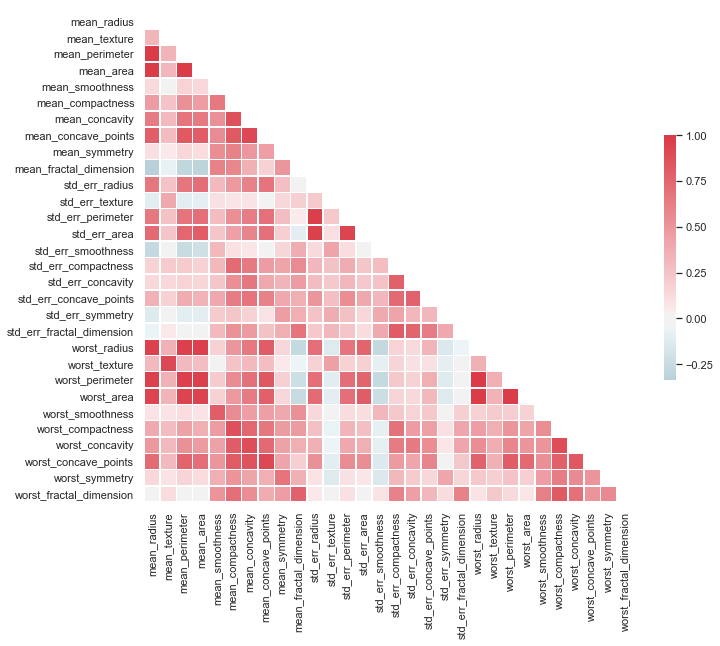

In [12]:
# plotting feature correlations
corr = X_train[measurements].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [13]:
# We can see that the features are perimeter, radius,concave_points and area are highly correlated. 
# Similarly concavity and compactness are highly correlated etc. We'll later check how dropping such features affect 
# our performance. We can also perform PCA to derive new dimensions from these features and drop the ones that
# doesn't explain significant variance.

In [14]:
# Now let's check the feature distributions. Assuming that a feature is discriminative of M or B category
# we can expect to see a superposition/mixture of standard distributions.

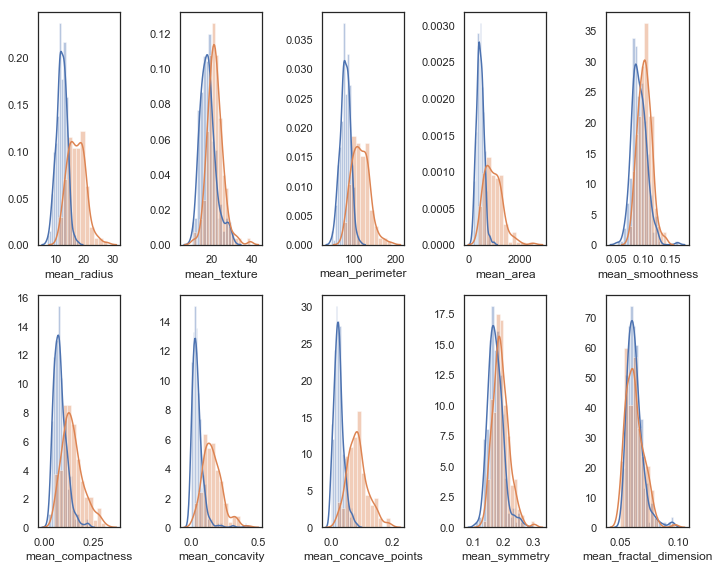

In [15]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 5,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('mean'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%5])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%5])
        j+=1
        if j==5:
            i+=1
plt.tight_layout()


# we can see that smoothness,symmetry, and fractal_dimensions are not
# very discriminative between M and B. Dropping these features might improve our
# model performance as we're getting rid of noisy features. 

# On the other hand, radius, perimeter, area, concave_points, compactness,concavity are good features
# that can help our predictive model.

# texture is a borderline case(due to sharp peaks) where it might or might not be useful in combination with other features.
# We can even use PCA to select features that explain the most variance.

# We can also see that all the distributions are close to a normal distribution.

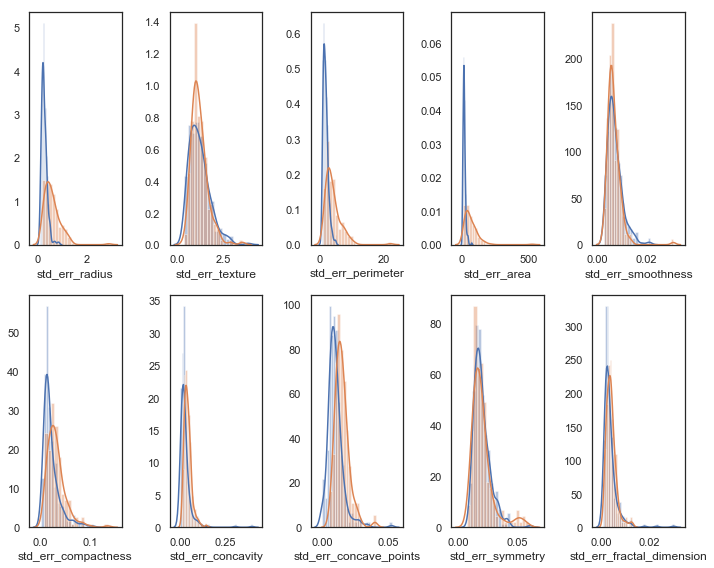

In [16]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 5,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('std_err'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%5])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%5])
        j+=1
        if j==5:
            i+=1
plt.tight_layout()

# it's the same story as before but on average mean seems to be a better feature than std_err

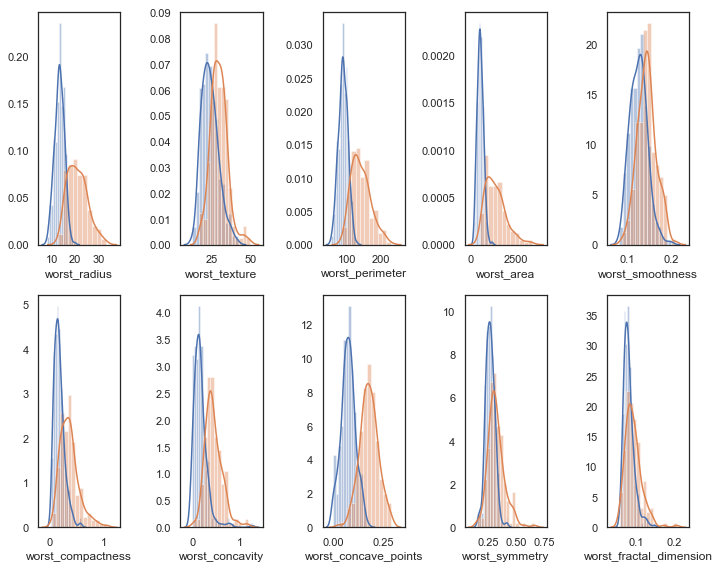

In [17]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 5,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('worst'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%5])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%5])
        j+=1
        if j==5:
            i+=1
plt.tight_layout()

# same as the mean plots.

# Feature engineering

In [18]:
# One feature that's obvious to add would be the volume of the tumor. This should be proportional to the 
# radius^3 of the tumor.
X_train['mean_volume'] = X_train['mean_radius']**3
X_train['worst_volume'] = X_train['worst_radius']**3

X_test['mean_volume'] = X_test['mean_radius']**3
X_test['worst_volume'] = X_test['worst_radius']**3


In [19]:
features = X_train.columns

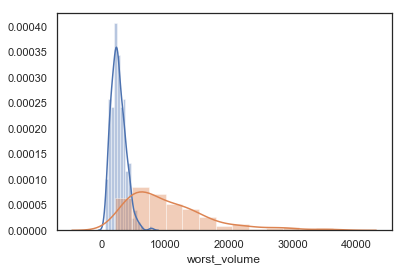

In [20]:
sns.distplot(X_train.loc[data['diagnosis']=='B','worst_volume'])
sns.distplot(X_train.loc[data['diagnosis']=='M','worst_volume'])

# Data preprocessing

In [21]:
# Scale the features to the same range
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [23]:
# grid search and 10-fold cross validation to choose best model and hyperparameters
svm_params = {'C':[0.001,0.01,0.1,10,20,100], 'kernel':['rbf','linear','sigmoid','poly'],'gamma':['auto'],'class_weight' : ['balanced']}
lr_params = {'C':[0.001,0.01,0.1,10,20,100],'solver' :['liblinear'],'class_weight' : ['balanced']}
dt_params = {'max_depth':[10,100]}
rf_params = {'n_estimators':[10,100],'class_weight' : ['balanced'],'max_depth':[10,100]}

models = []
models.append(('svm',SVC(),svm_params))
models.append(('lr',LogisticRegression(),lr_params))
models.append(('dt',DecisionTreeClassifier(),dt_params))
models.append(('rfc',RandomForestClassifier(),rf_params))


for label,model,param in models:
    model_grid = GridSearchCV(model,param,cv=10)
    model_grid.fit(X_train,y_train)
    best_parameters = model_grid.best_params_  
    print(label,best_parameters,model_grid.best_score_,model_grid.cv_results_['std_test_score'][model_grid.best_index_]) 
    

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'} 0.978021978021978 0.017059317995243788


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


lr {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'} 0.9692307692307692 0.02813126930826204
dt {'max_depth': 100} 0.9384615384615385 0.020963458762213918
rfc {'class_weight': 'balanced', 'max_depth': 100, 'n_estimators': 10} 0.9604395604395605 0.013039778277775856


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
# Based on the above results it seems SVM is the best model for this task as the accuracy is highest 
# for SVM with lowest variance. Therefore we'll train the SVM model with the abovementioned parameters.

In [191]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
svc = SVC(C=0.1,kernel='linear',gamma='auto',class_weight='balanced')
svc.fit(X_train,y_train);
svm_pred = svc.predict(X_test)
# Accuracy score
print('SVM_Accuracy --- ',accuracy_score(y_test,svm_pred))
# Precision score
print('SVM_Precision ---',precision_score(y_test,svm_pred,pos_label='M'))
# recall
print('SVM_Recall ---',recall_score(y_test,svm_pred,pos_label='M'))
# f1_score
print('SVM_F1_score ---' , f1_score(y_test,svm_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,svm_pred)

# we can also plot the precision_recall_curve or roc_curve here. 

SVM_Accuracy ---  0.9824561403508771
SVM_Precision --- 0.9736842105263158
SVM_Recall --- 0.9736842105263158
SVM_F1_score --- 0.9736842105263158


array([[75,  1],
       [ 1, 37]])

In [193]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(X_train,y_train);
lr_pred = lr.predict(X_test)
# Accuracy score
print('LR_Accuracy --- ',accuracy_score(y_test,lr_pred))
# Precision score
print('LR_Precision ---',precision_score(y_test,lr_pred,pos_label='M'))
# recall
print('LR_Recall ---',recall_score(y_test,lr_pred,pos_label='M'))
# f1_score
print('LR_F1_score ---' , f1_score(y_test,lr_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,lr_pred)


LR_Accuracy ---  0.9736842105263158
LR_Precision --- 0.9487179487179487
LR_Recall --- 0.9736842105263158
LR_F1_score --- 0.9610389610389611


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[74,  2],
       [ 1, 37]])

In [194]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
rfc = RandomForestClassifier(max_depth=100,n_estimators=10)
rfc.fit(X_train,y_train);
rfc_pred = rfc.predict(X_test)
# Accuracy score
print('RFC_Accuracy --- ',accuracy_score(y_test,rfc_pred))
# Precision score
print('RFC_Precision ---',precision_score(y_test,rfc_pred,pos_label='M'))
# recall
print('RFC_Recall ---',recall_score(y_test,rfc_pred,pos_label='M'))
# f1_score
print('RFC_F1_score ---' , f1_score(y_test,rfc_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,lr_pred)


RFC_Accuracy ---  0.956140350877193
RFC_Precision --- 0.9230769230769231
RFC_Recall --- 0.9473684210526315
RFC_F1_score --- 0.935064935064935


array([[74,  2],
       [ 1, 37]])

In [200]:
# Analyse the model and check the cases that are predicted wrongly
print(np.sum(svc.coef_[0]*X_test[(y_test!=pred) & (y_test=='B')]) + svc.intercept_)
print(np.sum(svc.coef_[0]*X_test[(y_test!=pred) & (y_test=='M')]) + svc.intercept_)

# Since we've used linear SVM, we can intepret the coefficients properly i.e dot product of the coefficient
# with the data > 0 means positive(M) class and < 0  means negative(B) class.

# We can see that in the case when the real data says "B", the dot product > 0 i.e. our model can confidently
# predict M.


# We can see that in the case when the real data says "M", the dot product < 0 i.e. our model will predict B.

# There are several reasons why this happens - 

# 1. labelling mistake in dataset.
# 2. Missing feature
# 3. Outlier

[0.16811516]
[-1.04400808]


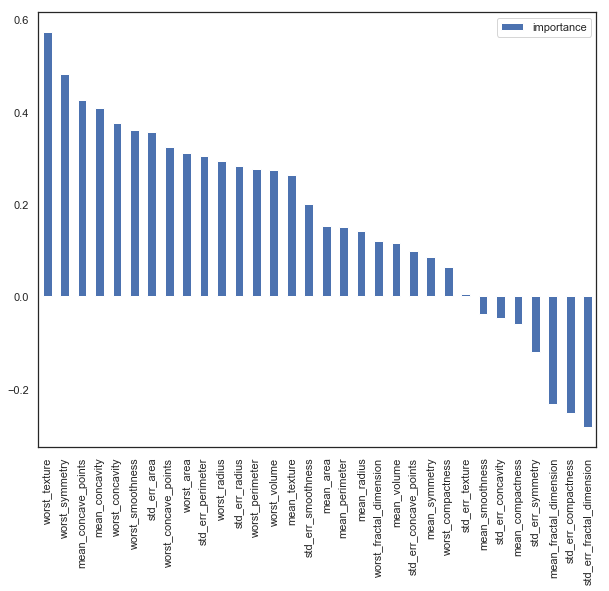

In [163]:
# feature behaviour according to linear svm's coefficient for "M" class prediction
pd.DataFrame(svc.coef_[0],features,columns=['importance']).sort_values('importance',ascending=False).plot(kind='bar',figsize=[10,8]);


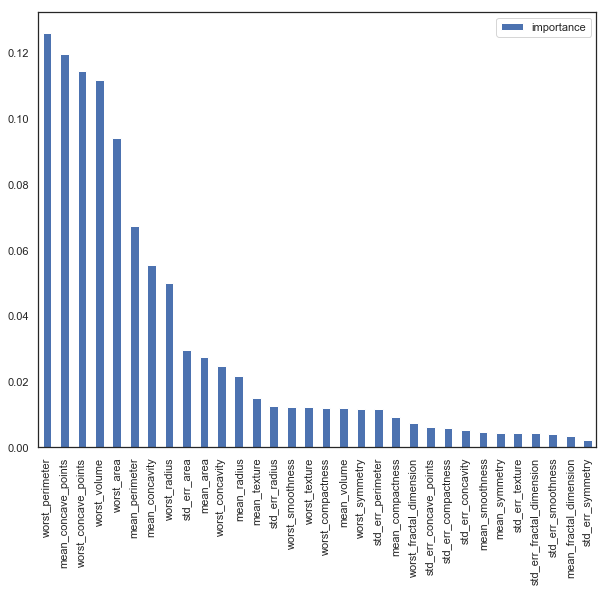

In [90]:
# We'll also train the random forest classifier and check the most important features.
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfc.fit(X_train,y_train)
confusion_matrix(y_test,rfc.predict(X_test))

# Plotting feature importance
pd.DataFrame(rfc.feature_importances_,features,columns=['importance']).sort_values('importance',ascending=False).plot(kind='bar',figsize=[10,8]);


# PCA - Dimensionality reduction

Dimensionality reduction as well as useful feature selection using Principal Component Analysis

In [29]:
from sklearn.decomposition import PCA

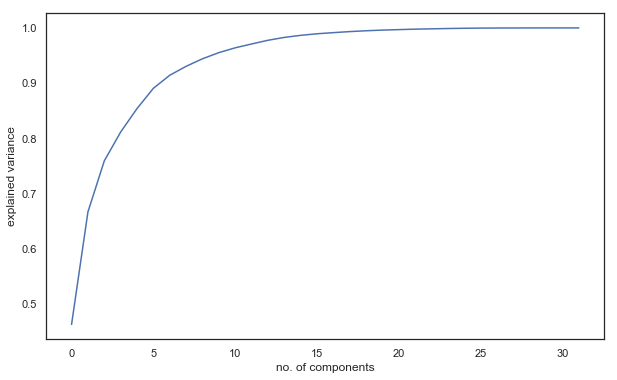

In [30]:
# Applying PCA for dimensionality reduction and feature independence
pca = PCA()
pca.fit(X_train)
plt.figure(figsize=[10,6])
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_.cumsum())  
plt.xlabel('no. of components')
plt.ylabel('explained variance');

# Top 17 features explain the 99% of the variance in the data.

In [103]:
pca = PCA(n_components = 17)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

In [104]:
# grid search and 10-fold cross validation to choose best model and hyperparameters
svm_params = {'C':[0.001,0.01,0.1,10,20,100], 'kernel':['rbf','linear','sigmoid','poly'],'gamma':['auto'],'class_weight' : ['balanced']}
lr_params = {'C':[0.001,0.01,0.1,10,20,100],'solver' :['liblinear'],'class_weight' : ['balanced']}
rf_params = {'n_estimators':[10,100],'class_weight' : ['balanced'],'max_depth':[10,100]}


models = []
models.append(('svm',SVC(),svm_params))
models.append(('lr',LogisticRegression(),lr_params))
models.append(('rfc',RandomForestClassifier(),rf_params))


for label,model,param in models:
    model_grid = GridSearchCV(model,param,cv=10)
    model_grid.fit(pca_X_train,y_train)
    best_parameters = model_grid.best_params_  
    print(label,best_parameters,model_grid.best_score_,model_grid.cv_results_['std_test_score'][model_grid.best_index_]) 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'} 0.9802197802197802 0.01827448048879691
lr {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'} 0.9802197802197802 0.018187122272610753
rfc {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100} 0.9516483516483516 0.01950265918743685


In [105]:
# We can see that even with only half the dimensions as before we get a slightly better performance here.
# We also notice that for SVM the kernel has changed from 'rbf' to 'linear' which is expected as PCA
# creates new features based on the superposition of the old feartures as independent from each other
# as possible.

In [142]:
svc = SVC(C=0.1,kernel='linear',gamma='auto',class_weight='balanced')
svc.fit(pca_X_train,y_train);

# Accuracy score
print('Accuracy --- ',accuracy_score(y_test,svc.predict(pca_X_test)))
# Precision score
print('Precision ---',precision_score(y_test,svc.predict(pca_X_test),pos_label='M'))
# recall
print('Recall ---',recall_score(y_test,svc.predict(pca_X_test),pos_label='M'))
# f1_score
print('F1_score ---' , f1_score(y_test,svc.predict(pca_X_test),pos_label='M'))

# confusion matrix
confusion_matrix(y_test,svc.predict(pca_X_test))


Accuracy ---  0.9824561403508771
Precision --- 0.9736842105263158
Recall --- 0.9736842105263158
F1_score --- 0.9736842105263158


array([[75,  1],
       [ 1, 37]])

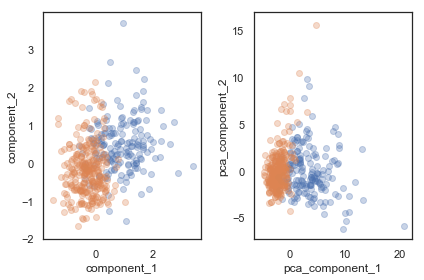

In [143]:
# Plot of first two features in our dataset vs first two components in PCA
# we can see that in case of PCA we can get a better accuracy by using a linear boundary
# even with only two features.
plt.subplot(1,2,1)
plt.scatter(X_train[y_train=='M',0],X_train[y_train=='M',1],alpha=0.3)
plt.scatter(X_train[y_train=='B',0],X_train[y_train=='B',1],alpha=0.3)
plt.xlabel('component_1')
plt.ylabel('component_2')

plt.subplot(1,2,2)
plt.scatter(pca_X_train[y_train=='M',0],pca_X_train[y_train=='M',1],alpha=0.3)
plt.scatter(pca_X_train[y_train=='B',0],pca_X_train[y_train=='B',1],alpha=0.3)
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

plt.tight_layout()

# Further Analysis

1. Customise the loss function to penalise the False negative (real M but predicted B) cases compared to 
 False postiive cases becasue false negatives can be life threatening in real setting while false postives
are just an annoyance relaively speaking. 

2. Deep dive into the cases that we predict wrong. This will help me understand what went wrong with the 
 model and how (if possible) we can fix this problem.
 
3. Visualise both categories using t-sne plots.

4. Deep dive into dimensionality reduction to choose just the optimal number of dimensions to save computaitonal power.

5. Compare the performance of neural networks, gradient boosting and knn on this data.

6. Try probabilistic graphical models.

7. Compare the model peformance by removing the correlated features and adding one feature(most important) at a time.

8. Effect of data size on the model performance.